<a href="https://colab.research.google.com/github/ChristopherJulien/Fluidic_Brain/blob/Directly_Saving_To_CSV/FlowSensorErrorCalibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README: To run this code

>
1.   Run cell *Plot Class*
2.   Import the data files you wish to plot (Whole data base can be find here)
3.   Run the cells with the type of plot you would like to see



---




## 1. Plot Class

In [ ]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
colors = cm.viridis(np.linspace(0.1,0.9, 25))


class Plot:
    def __init__(self,SLS1500_flag ):
        self.directory = os.getcwd()
        self.SLS1500_flag = SLS1500_flag

    # Function to plot measured vs. set flow rate
    def q_vs_qs_and_relative_error(self):
        q_set_list = []
        q_measured_list = []
        q_std_list = []
        q_percent_error_list = []

        if self.SLS1500_flag:
            print("SLS1500 Plotting")
            file_pattern = 'sls_flow_rate_forward_*.csv'
            search_pattern = r'sls_flow_rate_forward_(\d+\.\d+)_ul_min'
            files = glob.glob(os.path.join(self.directory, file_pattern))
        else:
            print("FLG Plotting")
            file_pattern = 'flg_flow_rate_forward_*.csv'
            search_pattern = r'flg_flow_rate_forward_(\d+\.\d+)_ul_min'
            files = glob.glob(os.path.join(self.directory, file_pattern))

        for filename in files:
            match = re.search(search_pattern, filename)
            if match:
                flow_rate = float(match.group(1))
                # if flow_rate == 11000.0: #TODO FIX TO ELIMINTATE LAST VARIABLE
                #     continue
            else:
                print("Error: Could not parse file name: {}".format(filename))
                sys.exit(1)

            df = pd.read_csv(filename)
            mL_min = (df['mL/min']).tolist()
            s = (df['ms']).tolist()
            s = np.array(s)
            low_filter = s > 1
            q = np.array(mL_min)
            q = q[low_filter]

            q_average = np.average(q)
            q_error = abs(q_average - flow_rate / 1000) / (flow_rate / 1000) * 100
            q_percent_error_list.append(q_error)

            q_std = np.std(q)
            q_measured_list.append(q_average)
            q_std_list.append(q_std)
            q_set_list.append(flow_rate / 1000)

        plt.figure(figsize=(10, 5)) # Fix to make plots appear larger

        # Plot measured vs. set flow rate
        plt.subplot(1, 2, 1)
        plt.errorbar(q_set_list, q_measured_list, yerr=q_std_list, fmt='o', capsize=5, label='Measured')
        plt.plot(q_set_list, q_set_list, label='Set', linestyle='--')
        plt.xlabel("Set Flow Rate (mL/min)")
        plt.ylabel("Measured Flow Rate (mL/min)")
        plt.title("Flow Rate Measurement")
        plt.legend()

        # Plot percent error
        plt.subplot(1, 2, 2)
        plt.plot(q_set_list, q_percent_error_list, 'o')
        plt.xlabel("Set Flow Rate (mL/min)")
        plt.ylabel("Percent Error (%)")
        plt.title("Flow Rate Measurement - Percent Error")

        plt.subplots_adjust(bottom=0.1, top=0.9)
        plt.tight_layout()
        plt.show()


    def flow_rate_over_time(self):

        print("Plotting Flow Rate Over Time")
        fig, ax = plt.subplots(1, 1, figsize=(16, 9))  # Set the figsize to the screen aspect ratio

        if self.SLS1500_flag:
            print("SLS1500 Plotting")
            file_pattern = 'sls_flow_rate_forward_*.csv'
            search_pattern = r'sls_flow_rate_forward_(\d+\.\d+)_ul_min'
            files = glob.glob(os.path.join(self.directory, file_pattern))

        else:
            print("FLG Plotting")
            file_pattern = 'flg_flow_rate_forward_*.csv'
            search_pattern = r'flg_flow_rate_forward_(\d+\.\d+)_ul_min'
            files = glob.glob(os.path.join(self.directory, file_pattern))


        for i, filename in enumerate(files):
            match = re.search(search_pattern, filename)
            if match:
                flow_rate = float(match.group(1))
                # if flow_rate == 25000.0: #TODO FIX TO ELIMINTATE LAST VARIABLE
                #     continue
            else:
                print("Error: Could not parse file name: {}".format(filename))
                sys.exit(1)

            df = pd.read_csv(filename)
            mL_min = (df['mL/min']).tolist()
            s = (df['ms']).tolist()
            ax.plot(s, mL_min, label='q measured {} mL/min'.format(flow_rate / 1000), c= colors[i])

        ax.autoscale(axis='y')
        ax.legend(fontsize=8, frameon=False)
        ax.set_xlabel("Time [s]", fontsize=20)
        ax.set_ylabel("Flow [mL/min]", fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.rcParams['figure.autolayout'] = True
        plt.rcParams['font.size'] = 9
        plt.rcParams['legend.edgecolor'] = '1'
        plt.legend(fontsize=12, frameon=False)  # Decrease the fontsize value to make the legend smaller



        plt.show()


## 2. Import data files to plot

---



Please upload the latest "Data_Calibration" files from the shared folder [here](https://hu-my.sharepoint.com/:f:/g/personal/cstocker_seas_harvard_edu/EudMPazUiHdOn5HpQpzs034B8USNM-WrRA-4BzcCpcBcPA?e=UrG3Y5). Then once it is saved it to your computer please upload using the following cell.

In [ ]:
from google.colab import files

uploaded_files = files.upload()

Saving sls_flow_rate_forward_15000.0_ul_min.csv to sls_flow_rate_forward_15000.0_ul_min.csv
Saving sls_flow_rate_forward_16000.0_ul_min.csv to sls_flow_rate_forward_16000.0_ul_min.csv
Saving sls_flow_rate_forward_16500.0_ul_min.csv to sls_flow_rate_forward_16500.0_ul_min.csv
Saving sls_flow_rate_forward_17000.0_ul_min.csv to sls_flow_rate_forward_17000.0_ul_min.csv
Saving sls_flow_rate_forward_17500.0_ul_min.csv to sls_flow_rate_forward_17500.0_ul_min.csv
Saving sls_flow_rate_forward_18000.0_ul_min.csv to sls_flow_rate_forward_18000.0_ul_min.csv
Saving sls_flow_rate_forward_18500.0_ul_min.csv to sls_flow_rate_forward_18500.0_ul_min.csv
Saving sls_flow_rate_forward_19000.0_ul_min.csv to sls_flow_rate_forward_19000.0_ul_min.csv
Saving sls_flow_rate_forward_19500.0_ul_min.csv to sls_flow_rate_forward_19500.0_ul_min.csv
Saving sls_flow_rate_forward_20000.0_ul_min.csv to sls_flow_rate_forward_20000.0_ul_min.csv
Saving sls_flow_rate_forward_20500.0_ul_min.csv to sls_flow_rate_forward_20500.0

## 3. Run Cells with plot commands

---



In [ ]:
plot_module = Plot(SLS1500_flag = True)


SLS1500 Plotting


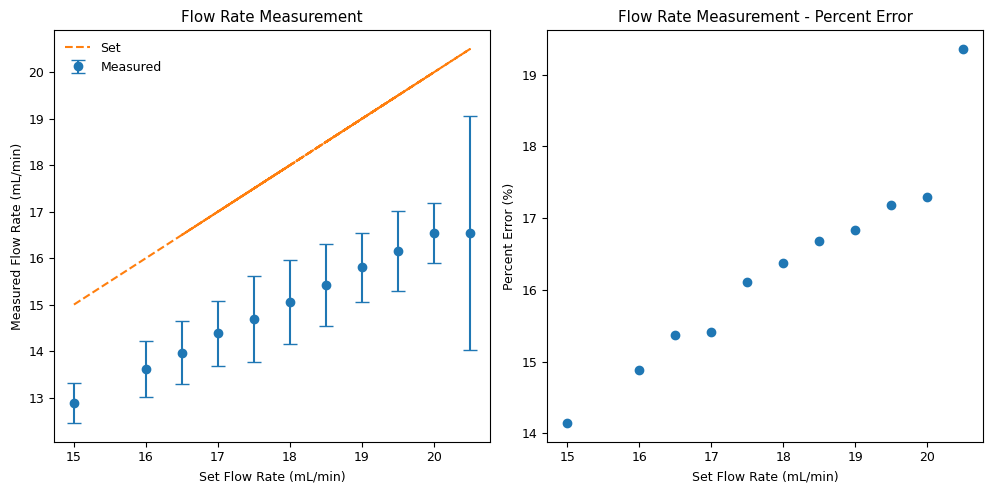

In [ ]:
plot_module.q_vs_qs_and_relative_error()


Plotting Flow Rate Over Time
SLS1500 Plotting


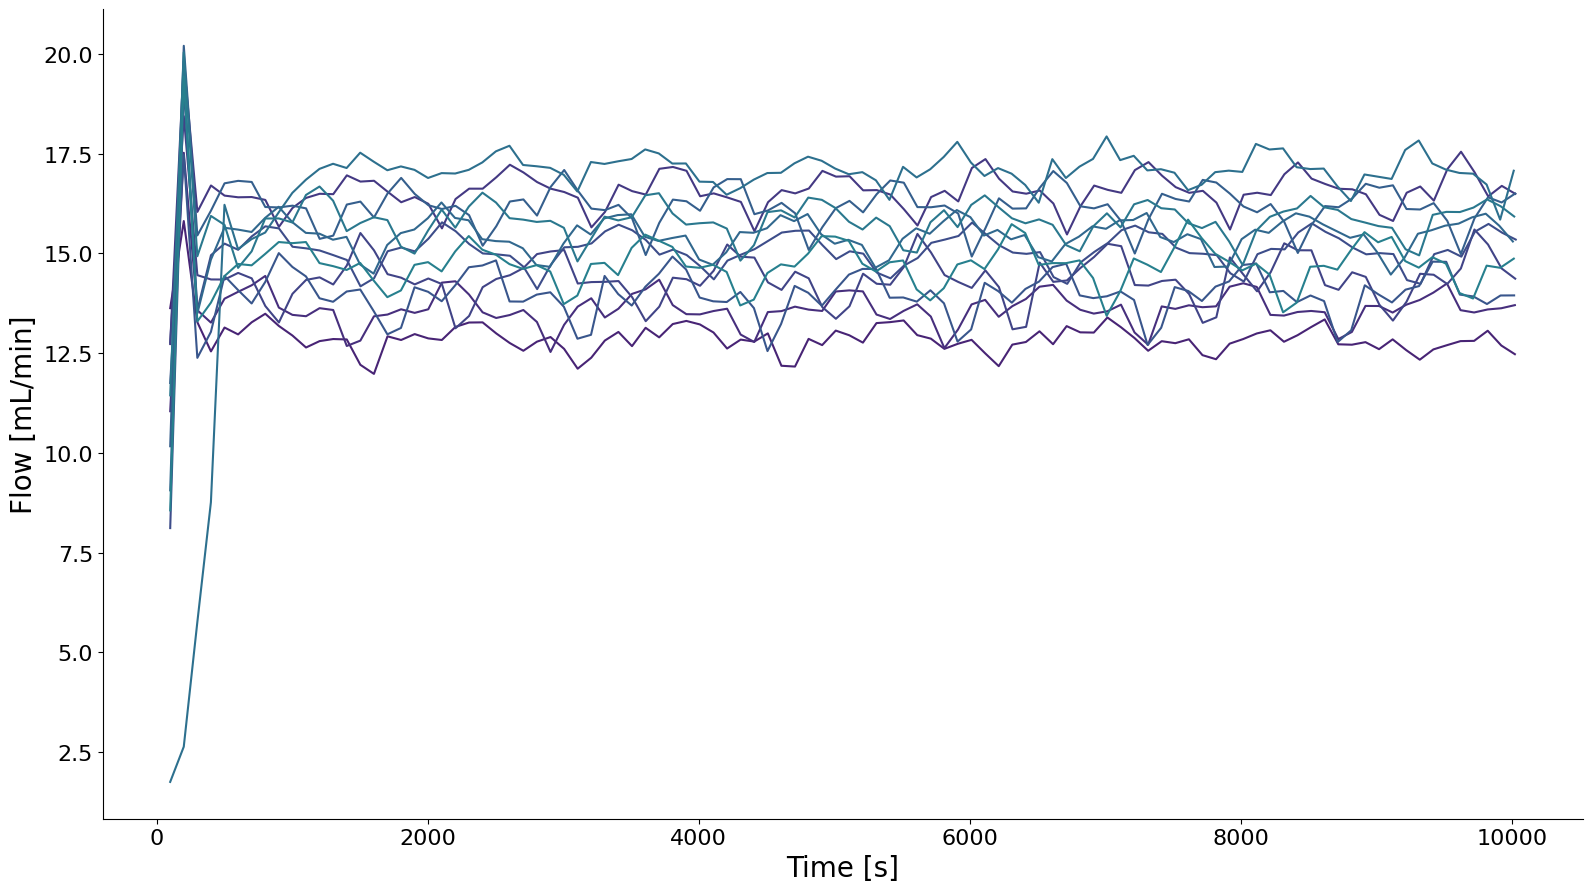

In [ ]:
plot_module.flow_rate_over_time()